## Mathematics in the Real World
### Simulating fair and weighted coin games
#### Prof. Jack Poulson; April 9, 2015 (Edited April 12, 2015)

<img src="files/images/dice.png" />

### Simulating the "keep flipping until tails" game with a fair coin

As we discussed in previous lectures, we can easily list out all of the possibilities for the "keep flipping until tails" game and compute their probabilities. When a fair coin is used, we end up with the following table:

<table>
<tr><td><strong>Flip 1</strong></td><td>H</td><td>H</td><td>H</td><td>T</td></tr>
<tr><td><strong>Flip 2</strong></td><td>H</td><td>H</td><td>T</td><td> </td></tr>
<tr><td><strong>Flip 3</strong></td><td>H</td><td>T</td><td> </td><td> </td></tr>
<tr><td><strong>Probability</strong></td><td>$\frac{1}{8}$</td><td>$\frac{1}{8}$</td><td>$\frac{1}{4}$</td><td>$\frac{1}{2}$</td></tr>
<tr><td><strong>Winnings</strong></td><td>\$3</td><td>\$2</td><td>\$1</td><td>\$0</td></tr>
</table>

If we denote the winnings for at most three coin flips in dollars by $W_3$ and the expectation as $E[W_3]$, we would find

$$ E[W_3] = 3*\frac{1}{8} + 2*\frac{1}{8} + 1*\frac{1}{4} + 0*\frac{1}{2} = \frac{7}{8}, $$

and, furthermore, we can easily see that, if we take into account the possibility of flipping heads up to $n$ times in a row, the expected winnings are

$$ E[W_n] = \sum_{k=1}^n \left(\frac{1}{2}\right)^k = 1 - \left(\frac{1}{2}\right)^n, $$

and, as $n$ goes to infinity, the expected winnings become $\$1$.

But when we performed an experiment in class by playing the game twenty times and taking the average, we saw that the average of these twenty trials was quite different from the expectation!

Thankfully, we can simulate much more detailed versions of the classroom experiment in a fraction of a second using computers' (pseudo-)random number generators and a small amount of [python](https://www.python.org/) code (which students uninterested in programming are welcome to ignore).

In order to mirror the in-class approach of rolling a six-sided die and assigning even rolls to heads and odd rolls to tails, we begin by writing a routine which 
randomly generated a whole number between one and six (inclusive) and then returning 0 if the number was even and 1 if the number was odd.

In [1]:
import random
def fairCoin():
    diceRoll = random.randint(1,6)
    return diceRoll % 2

We can now simulate a fair coin game by flipping the fair coin and either increasing the winnings by one if heads
is flipped (with heads represented by the number 0) or quitting and returning
the winnings so far if tails is flipped (with tails represented by the number 1).

In [2]:
def fairCoinGame():
    winnings = 0.
    while True:
        flip = fairCoin()
        if flip == 1:
            return winnings
        else:
            winnings = winnings + 1.
    return winnings

The experiment that we ran in class could then easily be replicated by playing the fair coin game twenty times and then dividing the total winnings by twenty, though we will soon see that it is beneficial to employ the following routine, which allows us to perform however many trials that we like.

In [3]:
def fairExperiment(numTrials):
    totalWinnings = 0.
    for trial in xrange(0,numTrials):
        totalWinnings = totalWinnings + fairCoinGame()
    return totalWinnings / numTrials

Since taking the average result from playing the coin game, for example, twenty times in a row could be different every time it is tried in the classroom, it is useful to repeat the experiment a large number of times and to keep track of the list of results (the list of average winnings from each batch of coin-flip games).

In [4]:
def multipleFairExperiments(numTrials,numRuns):
    averages = np.zeros(numRuns)
    for run in xrange(0,numRuns):
        averages[run] = fairExperiment(numTrials)
    return averages

We're finally in position to investigate what happened in class! In order to do so, we can plot the results (in red) from 100 different experiments identical to those performed in class, as well as (in blue) the results sorted from lowest to highest average winnings.

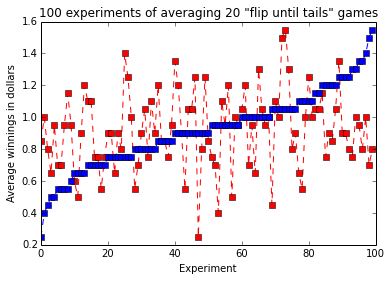

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

averages = multipleFairExperiments(numTrials=20,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 20 "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

As can be seen, despite the expected winnings being $\$1$, the sample average from each of the batches of twenty games varies quite dramatically! But, what might have happened if we had kept playing for 200 rounds instead of 20?

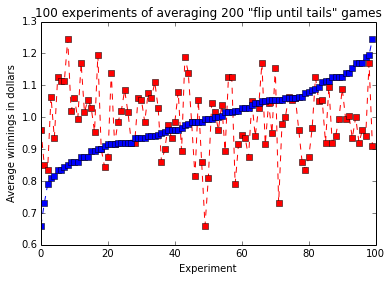

In [6]:
averages = multipleFairExperiments(numTrials=200,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 200 "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

As can be seen, for each of the $100$ experiments taking the average winnings from $200$ games, the sample averages are significantly better than with only 20 games. So it would appear that playing the game many, many times appears to produce an average result that agrees with our notion of an expectation. So we should, of course, go another step further and try averaging $2000$ games.

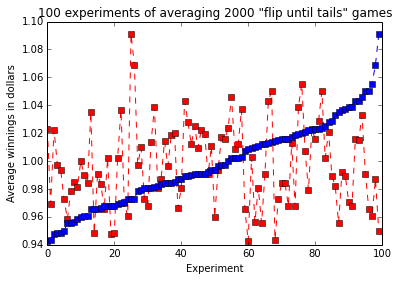

In [7]:
averages = multipleFairExperiments(numTrials=2000,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 2000 "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

Each of the experiments now produced sample averages which are nearing correctness in the first digit.

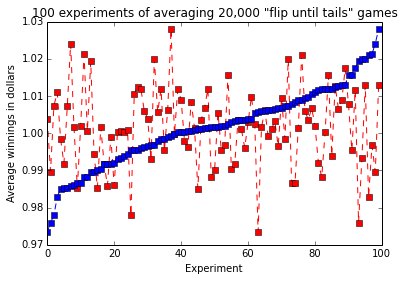

In [8]:
averages = multipleFairExperiments(numTrials=20000,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 20,000 "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

And, lastly, after running 100 experiments, each taking the average winnings from playing **20,000** coin-flip games, we see that the sample averages all tended to be accurate within a couple percent from our simple calculation of $\$1$.

### Simulating the "keep flipping until tails" game with a weighted coin

In an almost-identical manner as before, if we have a weighted coin which lands on tails with probability two-thirds and on heads with probability one-third (with apologies to [Gelman and Nolan](http://www.stat.columbia.edu/~gelman/research/published/diceRev2.pdf)), then we can easily analyze the "keep flipping until tails" game up to three coin-flips:

<table>
<tr><td><strong>Flip 1</strong></td><td>H</td><td>H</td><td>H</td><td>T</td></tr>
<tr><td><strong>Flip 2</strong></td><td>H</td><td>H</td><td>T</td><td> </td></tr>
<tr><td><strong>Flip 3</strong></td><td>H</td><td>T</td><td> </td><td> </td></tr>
<tr><td><strong>Probability</strong></td><td>$\frac{1}{27}$</td><td>$\frac{2}{27}$</td><td>$\frac{2}{9}$</td>
<td>$\frac{2}{3}$</td></tr>
<tr><td><strong>Winnings</strong></td><td>\$3</td><td>\$2</td><td>\$1</td><td>\$0</td></tr>
</table>

If we denote the winnings in dollars up to three coin-flips by $W_3$ and our expectation of these winnings by $E[W_3]$, we would find

$$ E[W_3] = 3*\frac{1}{27} + 2*\frac{2}{27} + 1*\frac{2}{9} + 0*\frac{2}{3} = \frac{13}{27}, $$

and that, for up to $n$ coin flips,

$$ E[W_n] = \sum_{k=1}^n \left(\frac{1}{3}\right)^k, $$

which, as $n$ goes to infinity, converges to $\frac{1}{2}$ (this was Problem 4 from Homework 1).

Just as was the case for the fair coin, our experiment in class of playing the game twenty times and averaging the resulting winnings ended up being pretty far off from the mathematical expectation. And the below computational experiments suggest that this is not exactly a rare event!

In [9]:
# Simulate our class experiment of rolling a six-sided die and assigning
# the rolls 1 and 2 to heads, versus 3, 4, 5, and 6 to tails. This gives a 
# two-thirds probability of rolling tails.
def weightedCoin():
    diceRoll = random.randint(1,6)
    if diceRoll == 1 or diceRoll == 2:
        return 0
    else:
        return 1

# Simulate a weighted coin game by flipping the weighted coin and either 
# increasing the winnings by one if heads is flipped (with heads represented 
# by the number 0) or quitting and returning the winnings if tails is flipped 
# (with tails represented by the number 1)
def weightedCoinGame():
    winnings = 0.
    while True:
        # Flip the coin and stop if tails (a flip of 1)
        flip = weightedCoin()
        if flip == 1:
            return winnings
        else:
            winnings = winnings + 1.
    return winnings

# Run an experiment where we average the result from 'numTrials' coin-flip games
# limited to at most 'flipLimit' coin-flips (in class, this is usually three)
def weightedExperiment(numTrials):
    totalWinnings = 0.
    for trial in xrange(0,numTrials):
        totalWinnings = totalWinnings + weightedCoinGame()
    return totalWinnings / numTrials

# Collect the results from a large number of experiments into a list
def multipleWeightedExperiments(numTrials,numRuns):
    averages = np.zeros(numRuns)
    for run in xrange(0,numRuns):
        averages[run] = weightedExperiment(numTrials)
    return averages

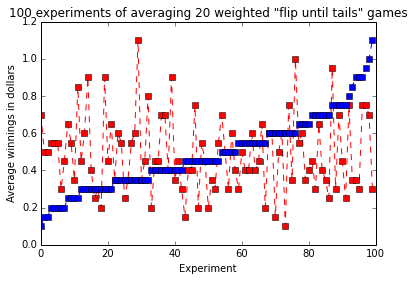

In [10]:
averages = multipleWeightedExperiments(numTrials=20,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 20 weighted "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

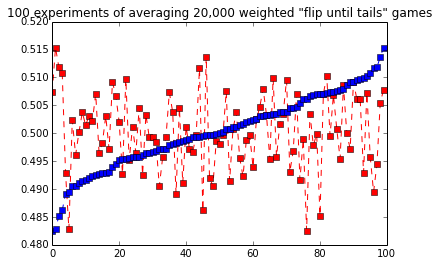

In [11]:
averages = multipleWeightedExperiments(numTrials=20000,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 20,000 weighted "flip until tails" games')

### Simulating the "keep flipping until tails" game with a weighted coin and payoff doubling

Now tweaking the payoff from the last section so that the winnings from each successive heads double as $\$1$, $\$2$, $\$4$, etc.,
we could explicitly list the different possibilities and payoffs up to three flips via

<table>
<tr><td><strong>Flip 1</strong></td><td>H</td><td>H</td><td>H</td><td>T</td></tr>
<tr><td><strong>Flip 2</strong></td><td>H</td><td>H</td><td>T</td><td> </td></tr>
<tr><td><strong>Flip 3</strong></td><td>H</td><td>T</td><td> </td><td> </td></tr>
<tr><td><strong>Probability</strong></td><td>$\frac{1}{27}$</td><td>$\frac{2}{27}$</td><td>$\frac{2}{9}$</td>
<td>$\frac{2}{3}$</td></tr>
<tr><td><strong>Winnings</strong></td><td>\$7</td><td>\$3</td><td>\$1</td><td>\$0</td></tr>
</table>

such that the expected winnings in dollars would be

$$ E[W_3] = 7*\frac{1}{27} + 3*\frac{2}{27} + 1*\frac{2}{9} + 0*\frac{2}{3} = \frac{19}{27}, $$

and that, for up to $n$ coin flips,

$$ E[W_n] = \sum_{k=1}^n \frac{1}{2} \left(\frac{2}{3}\right)^k = \frac{1}{2} \sum_{k=1}^n \left(\frac{2}{3}\right)^k, $$

which, as $n$ goes to infinity, converges to $\$1$ (this was Problem 5 from Homework 1).

We can now quickly simulate the average payouts from the game for many instances of 20 games and 20,000 games.

In [12]:
# Simulate a weighted coin game with doubling by flipping the weighted coin 
# and either increasing the winnings by twice the previous amount (starting at $1) 
# if heads is flipped (with heads represented by the number 0) or quitting and 
# returning the winnings if tails is flipped (with tails represented by the number 1)
def doublingWeightedCoinGame():
    winnings = 0.
    payoff = 1.
    while True:
        # Flip the coin and stop if tails (a flip of 1)
        flip = weightedCoin()
        if flip == 1:
            return winnings
        else:
            winnings = winnings + payoff
            payoff = 2.*payoff
    return winnings

# Run an experiment where we average the result from 'numTrials' coin-flip games
# limited to at most 'flipLimit' coin-flips (in class, this is usually three)
def doublingWeightedExperiment(numTrials):
    totalWinnings = 0.
    for trial in xrange(0,numTrials):
        totalWinnings = totalWinnings + doublingWeightedCoinGame()
    return totalWinnings / numTrials

# Collect the results from a large number of experiments into a list
def multipleDoublingWeightedExperiments(numTrials,numRuns):
    averages = np.zeros(numRuns)
    for run in xrange(0,numRuns):
        averages[run] = doublingWeightedExperiment(numTrials)
    return averages

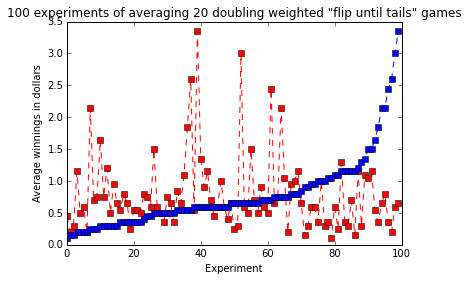

In [13]:
averages = multipleDoublingWeightedExperiments(numTrials=20,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 20 doubling weighted "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

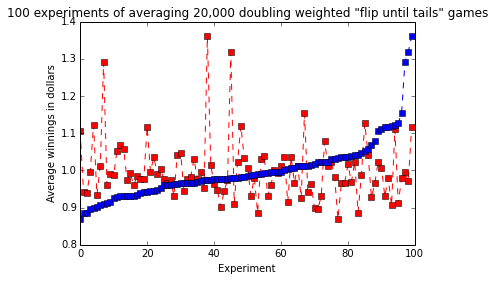

In [14]:
averages = multipleDoublingWeightedExperiments(numTrials=20000,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 20,000 doubling weighted "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

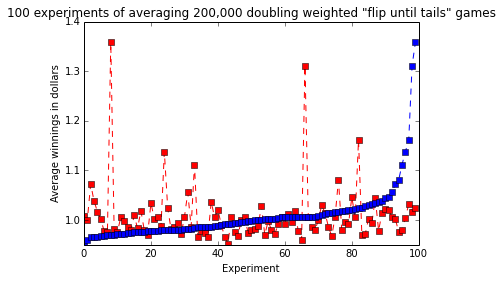

In [16]:
averages = multipleDoublingWeightedExperiments(numTrials=200000,numRuns=100)
sortedAvg = np.sort(averages)
plt.plot(averages,'rs--',sortedAvg,'bs--')
plt.title('100 experiments of averaging 200,000 doubling weighted "flip until tails" games')
plt.ylabel('Average winnings in dollars')
plt.xlabel('Experiment')

As can be seen from these experiments, even **200,000** games is not enough for the sample average to reliably be within 20 percent of the expected winnings. **This phenomenon is due to the fact that rare events events (i.e., large payouts) have a substantial impact on the overall average. Thus, an experiment must involve a large number of samples so that rare events are properly accounted for.** Future lectures will introduce precise ways of quantifying this behaviour.